In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import pandas_datareader.data as web

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [52]:
print(keras.__version__)

2.1.3-tf


In [53]:
def stockplotter(ticker):
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo','2018','2021')['Adj Close']
        df_1 = pd.DataFrame(data)#.reset_index()
        
        df_1.plot(figsize=(12,8))
        plt.title("Housing Price Trends ")
        #plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
        plt.xlabel('Year')
        plt.ylabel('Home Prices')
        plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Symbols,AAPL,GOOGL,AMZN,MSFT,DAL
Date,,,,,
2018-01-02,41.442081,1073.209961,1189.010010,82.383636,53.520050
2018-01-03,41.434864,1091.520020,1204.199951,82.767044,52.529640
2018-01-04,41.627323,1095.760010,1209.589966,83.495522,52.529640
2018-01-05,42.101261,1110.290039,1229.140015,84.530701,52.793751
2018-01-08,41.944889,1114.209961,1246.869995,84.616966,51.576958
...,...,...,...,...,...
2020-12-24,131.970001,1734.160034,3172.689941,222.750000,39.730000
2020-12-28,136.690002,1773.959961,3283.959961,224.960007,40.150002
2020-12-29,134.869995,1757.760010,3322.000000,224.149994,40.029999


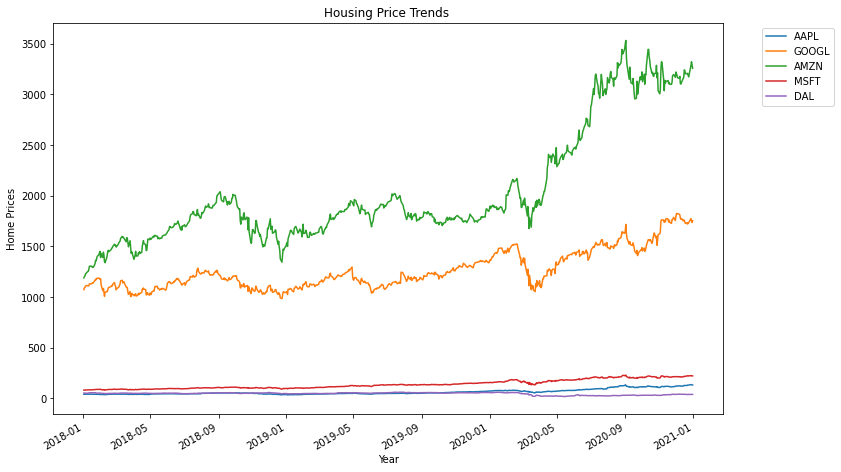

In [54]:
#df_1 = stockplotter(['XYZC'])
df_1 = stockplotter([['AAPL','GOOGL','AMZN','MSFT','DAL']])
df_1

In [55]:
# ## List of symbols to grab
# symbols = ['FB','AAPL','GOOGL','AMZN','MSFT']
# data = {}
# for stock in symbols:
#     data[stock] = web.DataReader(stock,'yahoo','2018','2021')['Adj Close']
# df_1 = pd.DataFrame(data)#.reset_index()
# df_1

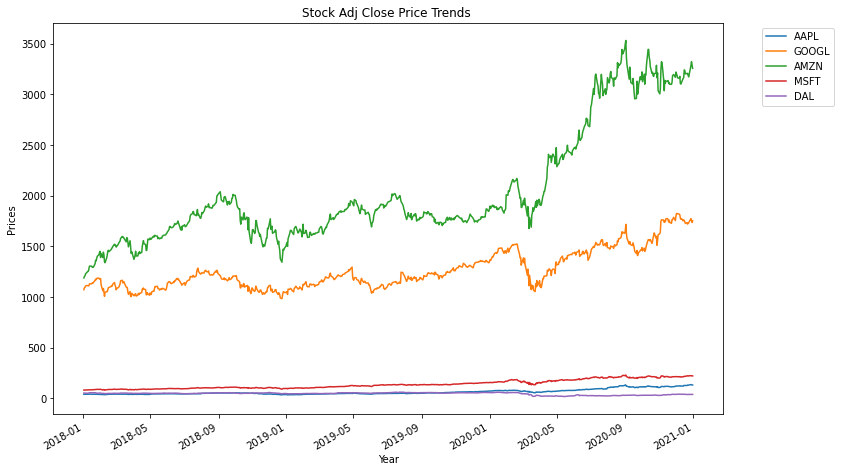

In [104]:
df_1.plot(figsize=(12,8))
plt.title("Stock Adj Close Price Trends ")
#plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
plt.xlabel('Year')
plt.ylabel('Prices')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

In [105]:
#df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

#Get the stock quote 
df = web.DataReader('TSLA', data_source='yahoo', start='2016-01-01', end='2021-1-11') 

In [106]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


In [107]:
df.shape

(1265, 6)

Text(0, 0.5, 'Close Price USD ($)')

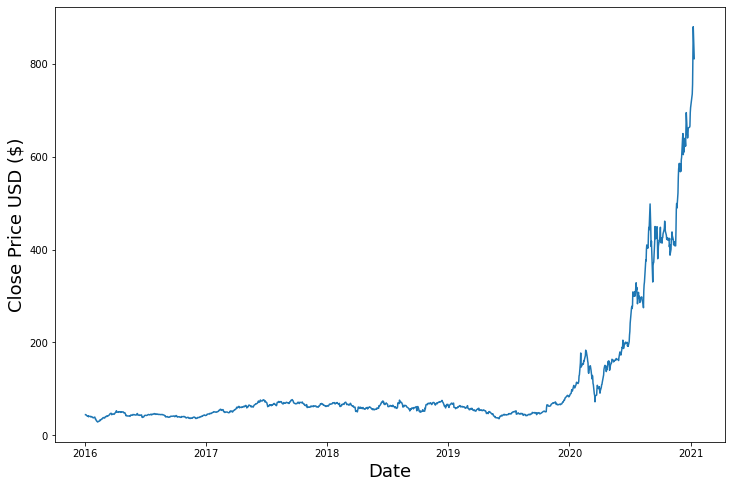

In [108]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [109]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()

In [110]:
dataset = df['Adj Close']
# dataset = data.values

In [111]:
def preprocessing(df,percentage):
    training_data_len = int(np.round(len(df) * percentage))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [112]:
training_data_len, dataset, scaler, scaled_data = preprocessing(dataset, percentage=.8)

In [113]:
#training_data_len = int(np.round(len(dataset) * .8))

In [114]:
training_data_len

1012

In [115]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = []    #dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        y_test.append(test_data[i,0])
        
    X_train, y_train = np.array(X_train), np.array(y_train)    
        
    return X_train, X_test, y_train, y_test    

In [116]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [117]:
len(X_train[0])

60

In [118]:
X_train

array([[[0.01873401],
        [0.01873871],
        [0.01770733],
        ...,
        [0.02034334],
        [0.0203128 ],
        [0.01955159]],

       [[0.01873871],
        [0.01770733],
        [0.01691089],
        ...,
        [0.0203128 ],
        [0.01955159],
        [0.02022822]],

       [[0.01770733],
        [0.01691089],
        [0.01581842],
        ...,
        [0.01955159],
        [0.02022822],
        [0.02206544]],

       ...,

       [[0.02374525],
        [0.02448531],
        [0.0266162 ],
        ...,
        [0.06733107],
        [0.07032654],
        [0.07233057]],

       [[0.02448531],
        [0.0266162 ],
        [0.02683469],
        ...,
        [0.07032654],
        [0.07233057],
        [0.07644669]],

       [[0.0266162 ],
        [0.02683469],
        [0.02727168],
        ...,
        [0.07233057],
        [0.07644669],
        [0.08186908]]])

In [119]:
X_train.shape

(952, 60, 1)

In [120]:

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
__________

In [122]:
#train the model
#model checkpoint save_weights_only=True
#fresh_model.load_weights  load_model
#model.save(), load_model('')
model.fit(X_train,y_train, epochs=50, batch_size=32 ) 

Epoch 1/50
952/952 [==============================] - 9s 9ms/step - loss: 2.3013e-04
Epoch 2/50
952/952 [==============================] - 6s 6ms/step - loss: 6.6443e-05
Epoch 3/50
952/952 [==============================] - 6s 6ms/step - loss: 3.8625e-05
Epoch 4/50
952/952 [==============================] - 6s 6ms/step - loss: 3.5106e-05
Epoch 5/50
952/952 [==============================] - 6s 6ms/step - loss: 3.3854e-05
Epoch 6/50
952/952 [==============================] - 6s 6ms/step - loss: 2.7992e-05
Epoch 7/50
952/952 [==============================] - 6s 6ms/step - loss: 2.8739e-05
Epoch 8/50
952/952 [==============================] - 6s 6ms/step - loss: 2.5901e-05
Epoch 9/50
952/952 [==============================] - 6s 6ms/step - loss: 2.3191e-05
Epoch 10/50
952/952 [==============================] - 6s 6ms/step - loss: 2.1954e-05
Epoch 11/50
952/952 [==============================] - 6s 6ms/step - loss: 2.2173e-05
Epoch 12/50
952/952 [==============================] - 6s 6ms/s

In [123]:
pwd

'/Users/davidtorres/Flatiron_041320/Model_5/dsc-capstone-project-v2-onl01-dtsc-pt-041320'

In [124]:
model.save('best_model_parameters.h5')

In [125]:
from tensorflow import keras
from keras.models import load_model

In [126]:
#model_params = keras.models.load_model(best_model)
model1 = load_model('best_model_parameters.h5')

# summarize model.
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
__________

In [127]:
#convert data to a numpy array
X_test = np.array(X_test)

In [128]:
X_test.shape

(253, 60)

In [129]:
#number of rows, number of timeseteps, number of features
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [130]:
X_test.shape

(253, 60, 1)

In [131]:
#get models predicted price values for X_test dataset
#want predcitions to contain same values as y_test dataset once we inverse_transform
#getting predcitiosn off of X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [132]:
predictions

array([[ 93.60594 ],
       [ 95.00903 ],
       [ 97.24516 ],
       [100.30011 ],
       [102.34515 ],
       [102.91404 ],
       [102.3648  ],
       [102.85775 ],
       [105.04147 ],
       [107.88274 ],
       [110.03238 ],
       [110.88932 ],
       [111.147606],
       [111.71017 ],
       [114.881   ],
       [119.54739 ],
       [129.12231 ],
       [144.22466 ],
       [153.03389 ],
       [155.32574 ],
       [153.5249  ],
       [151.13126 ],
       [149.50041 ],
       [148.49303 ],
       [149.50606 ],
       [151.49669 ],
       [155.86989 ],
       [163.29852 ],
       [170.24307 ],
       [175.02324 ],
       [174.65959 ],
       [169.74773 ],
       [162.62013 ],
       [152.06589 ],
       [141.23358 ],
       [136.11836 ],
       [136.23407 ],
       [139.32602 ],
       [142.13063 ],
       [142.93266 ],
       [138.40202 ],
       [132.94879 ],
       [128.35046 ],
       [122.41336 ],
       [116.06328 ],
       [106.85312 ],
       [ 97.0582  ],
       [ 86.5

In [133]:
#evaluate model w/RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

291.5101853022198

In [134]:
predictions = pd.DataFrame(predictions, columns=['Predictions'])

In [135]:
train = dataset[:training_data_len]
valid = dataset[training_data_len:] #data from index training_data_len to 

In [136]:
len(predictions), len(valid)

(253, 253)

In [137]:
valid.reset_index(inplace=True)

In [138]:
valid.head()

,Date,Adj Close
0,2020-01-10,95.629997
1,2020-01-13,104.972000
2,2020-01-14,107.584000
3,2020-01-15,103.699997
4,2020-01-16,102.697998


In [139]:
predictions.head()

,Predictions
0,93.605942
1,95.009033
2,97.245163
3,100.300110
4,102.345154


In [140]:
valid['Prediction'] = predictions['Predictions']

In [141]:
valid1 = valid.set_index('Date')

In [142]:
valid1.head()

,Adj Close,Prediction
Date,,
2020-01-10,95.629997,93.605942
2020-01-13,104.972000,95.009033
2020-01-14,107.584000,97.245163
2020-01-15,103.699997,100.300110
2020-01-16,102.697998,102.345154


KeyError: 'Close'

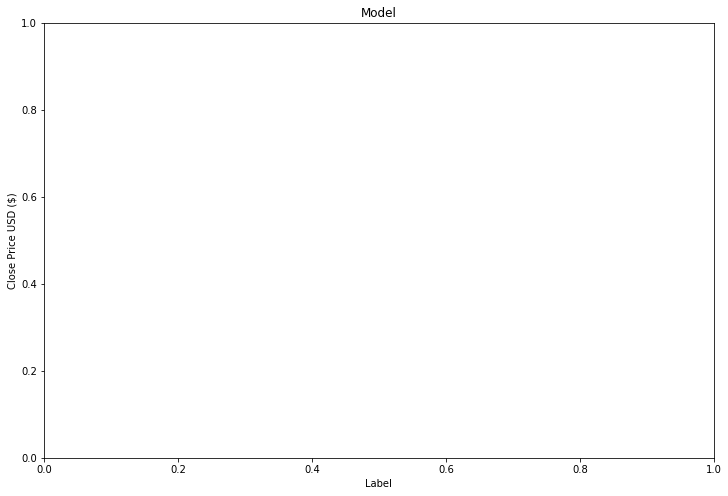

In [143]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be
"""

# train = dataset[:training_data_len]
# valid = dataset[training_data_len:] #data from index training_data_len to 
# valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Label')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
#plt.plot(valid[['Close','Predictions']])
plt.plot(valid1['Close'])
plt.plot(valid1['Prediction'])
# #valid[['Close','Predictions']].plot()
plt.legend(['Train','Valid','Predictions'],loc='lower right')

In [ ]:
dataset.tail()

In [ ]:
"""
predict closing price fo apple stock for 12/18/2019

get the quote
"""
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #realreate empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predcited scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price                    

In [ ]:
get_quote(dataset)